In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data

In [5]:
y = data.target

In [6]:
X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [8]:
from sklearn.model_selection import ShuffleSplit

In [9]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
train_index, test_index = next(ss.split(X, y))

In [11]:
X_train, X_test = X[train_index], X[test_index]

In [12]:
y_train, y_test = y[train_index], y[test_index]

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [14]:
from sklearn.feature_selection import SelectKBest

In [15]:
from sklearn.feature_selection import chi2

In [16]:
skb = SelectKBest(chi2, k=20)

In [17]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x10ba35a28>)

In [18]:
X_train_new = skb.transform(X_train)

In [19]:
X_train_new.shape, X_train.shape

((455, 20), (455, 30))

In [20]:
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False], dtype=bool)

In [21]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], 
      dtype='|S23')

In [22]:
data.feature_names[~skb.get_support()]

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'], 
      dtype='|S23')

In [23]:
from sklearn import linear_model

In [24]:
clf = linear_model.LogisticRegression()

In [25]:
from sklearn.model_selection import StratifiedKFold


In [28]:
k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:
    ss = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    
    score = []
    for train_index, val_index in ss.split(X_train, y_train):
        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]
        
        skb = SelectKBest(chi2, k=k)
        skb.fit(X_train2, y_train2)
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        clf.fit(X_new_train2, y_train2)
        score.append(clf.score(X_new_val, y_val))
    
    scores.append( np.array(score).mean())
    std.append( np.array(score).std() )

scores = np.array(scores)
std = np.array(std)

In [29]:
scores

array([ 0.90772947,  0.927343  ,  0.92743961,  0.92516908,  0.93845411,
        0.93188406,  0.93845411,  0.94280193,  0.95149758,  0.9536715 ,
        0.9536715 ,  0.9536715 ,  0.95149758,  0.95149758,  0.94927536,
        0.94927536,  0.95149758,  0.9536715 ,  0.95149758,  0.95144928,
        0.94927536,  0.9536715 ,  0.95144928,  0.95144928,  0.94927536,
        0.95589372,  0.95806763,  0.95806763,  0.95806763,  0.95806763])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

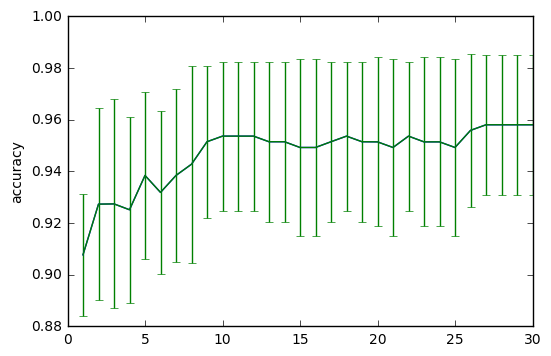

In [31]:
plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel('accuracy')

<Container object of 30 artists>

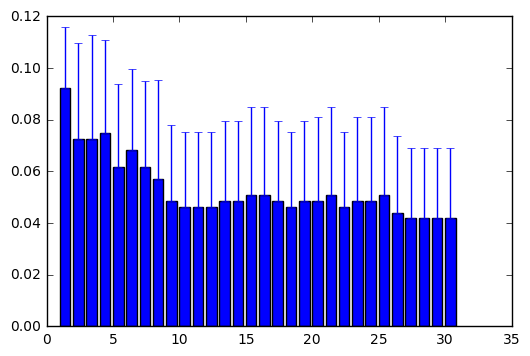

In [33]:
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), std])

In [35]:
std.shape

(30,)

In [36]:
best_k = k_range[np.argmax(scores)]

In [37]:
best_k

27

In [38]:
skb = SelectKBest(chi2, k=best_k)

In [39]:
skb.fit(X_train, y_train)

SelectKBest(k=27, score_func=<function chi2 at 0x10ba35a28>)

In [41]:
X_train_best = skb.transform(X_train)
X_test_best = skb.transform(X_test)

In [42]:
clf.fit(X_train_best, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
clf.score(X_test_best, y_test)

0.95614035087719296

In [44]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
clf.score(X_test, y_test)

0.95614035087719296

In [46]:
import numpy as np

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
data = load_breast_cancer()

In [49]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [50]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

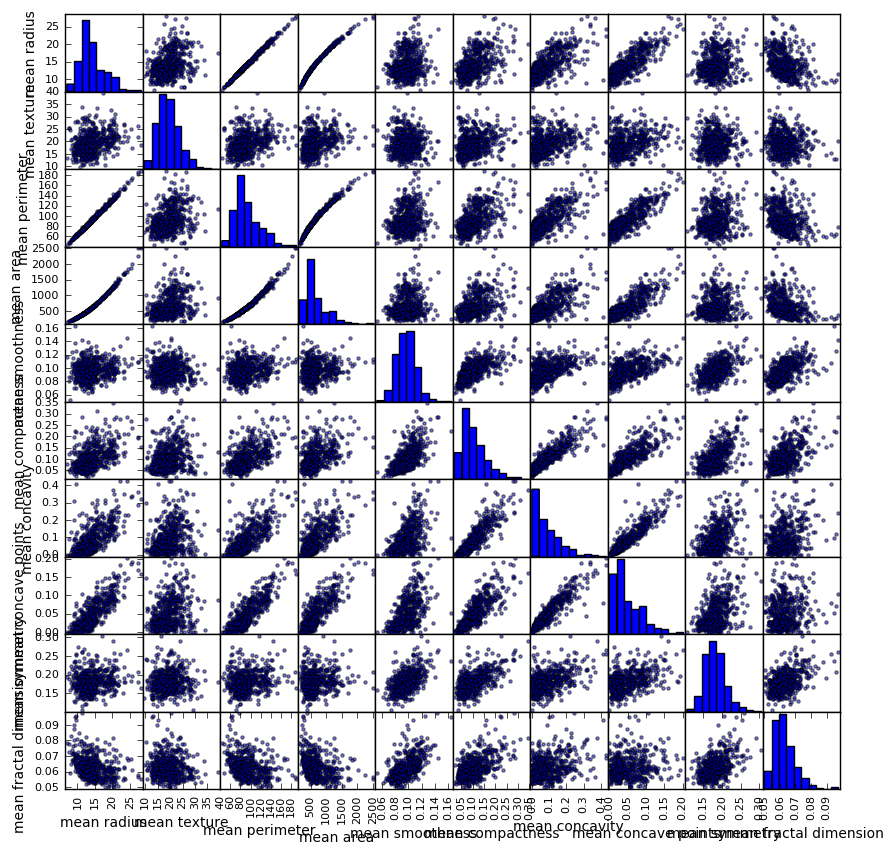

In [51]:
df = pd.DataFrame(data.data[:, 0:10], columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10,10));

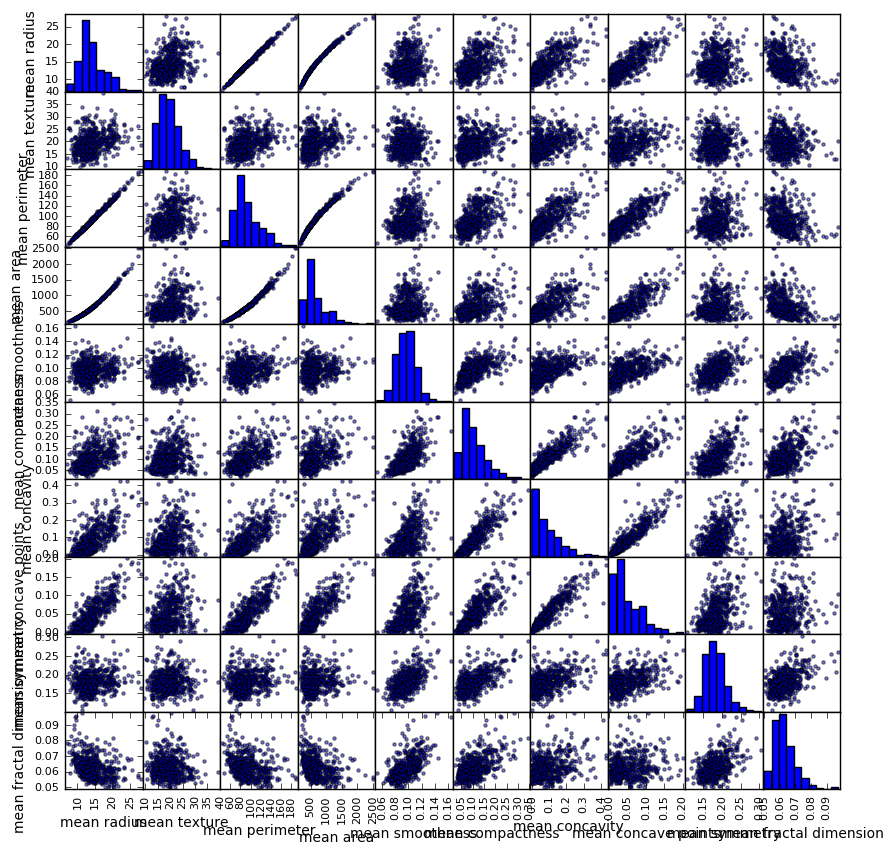

In [52]:
scatter_matrix(df, figsize=(10,10));

In [54]:
import seaborn as sns

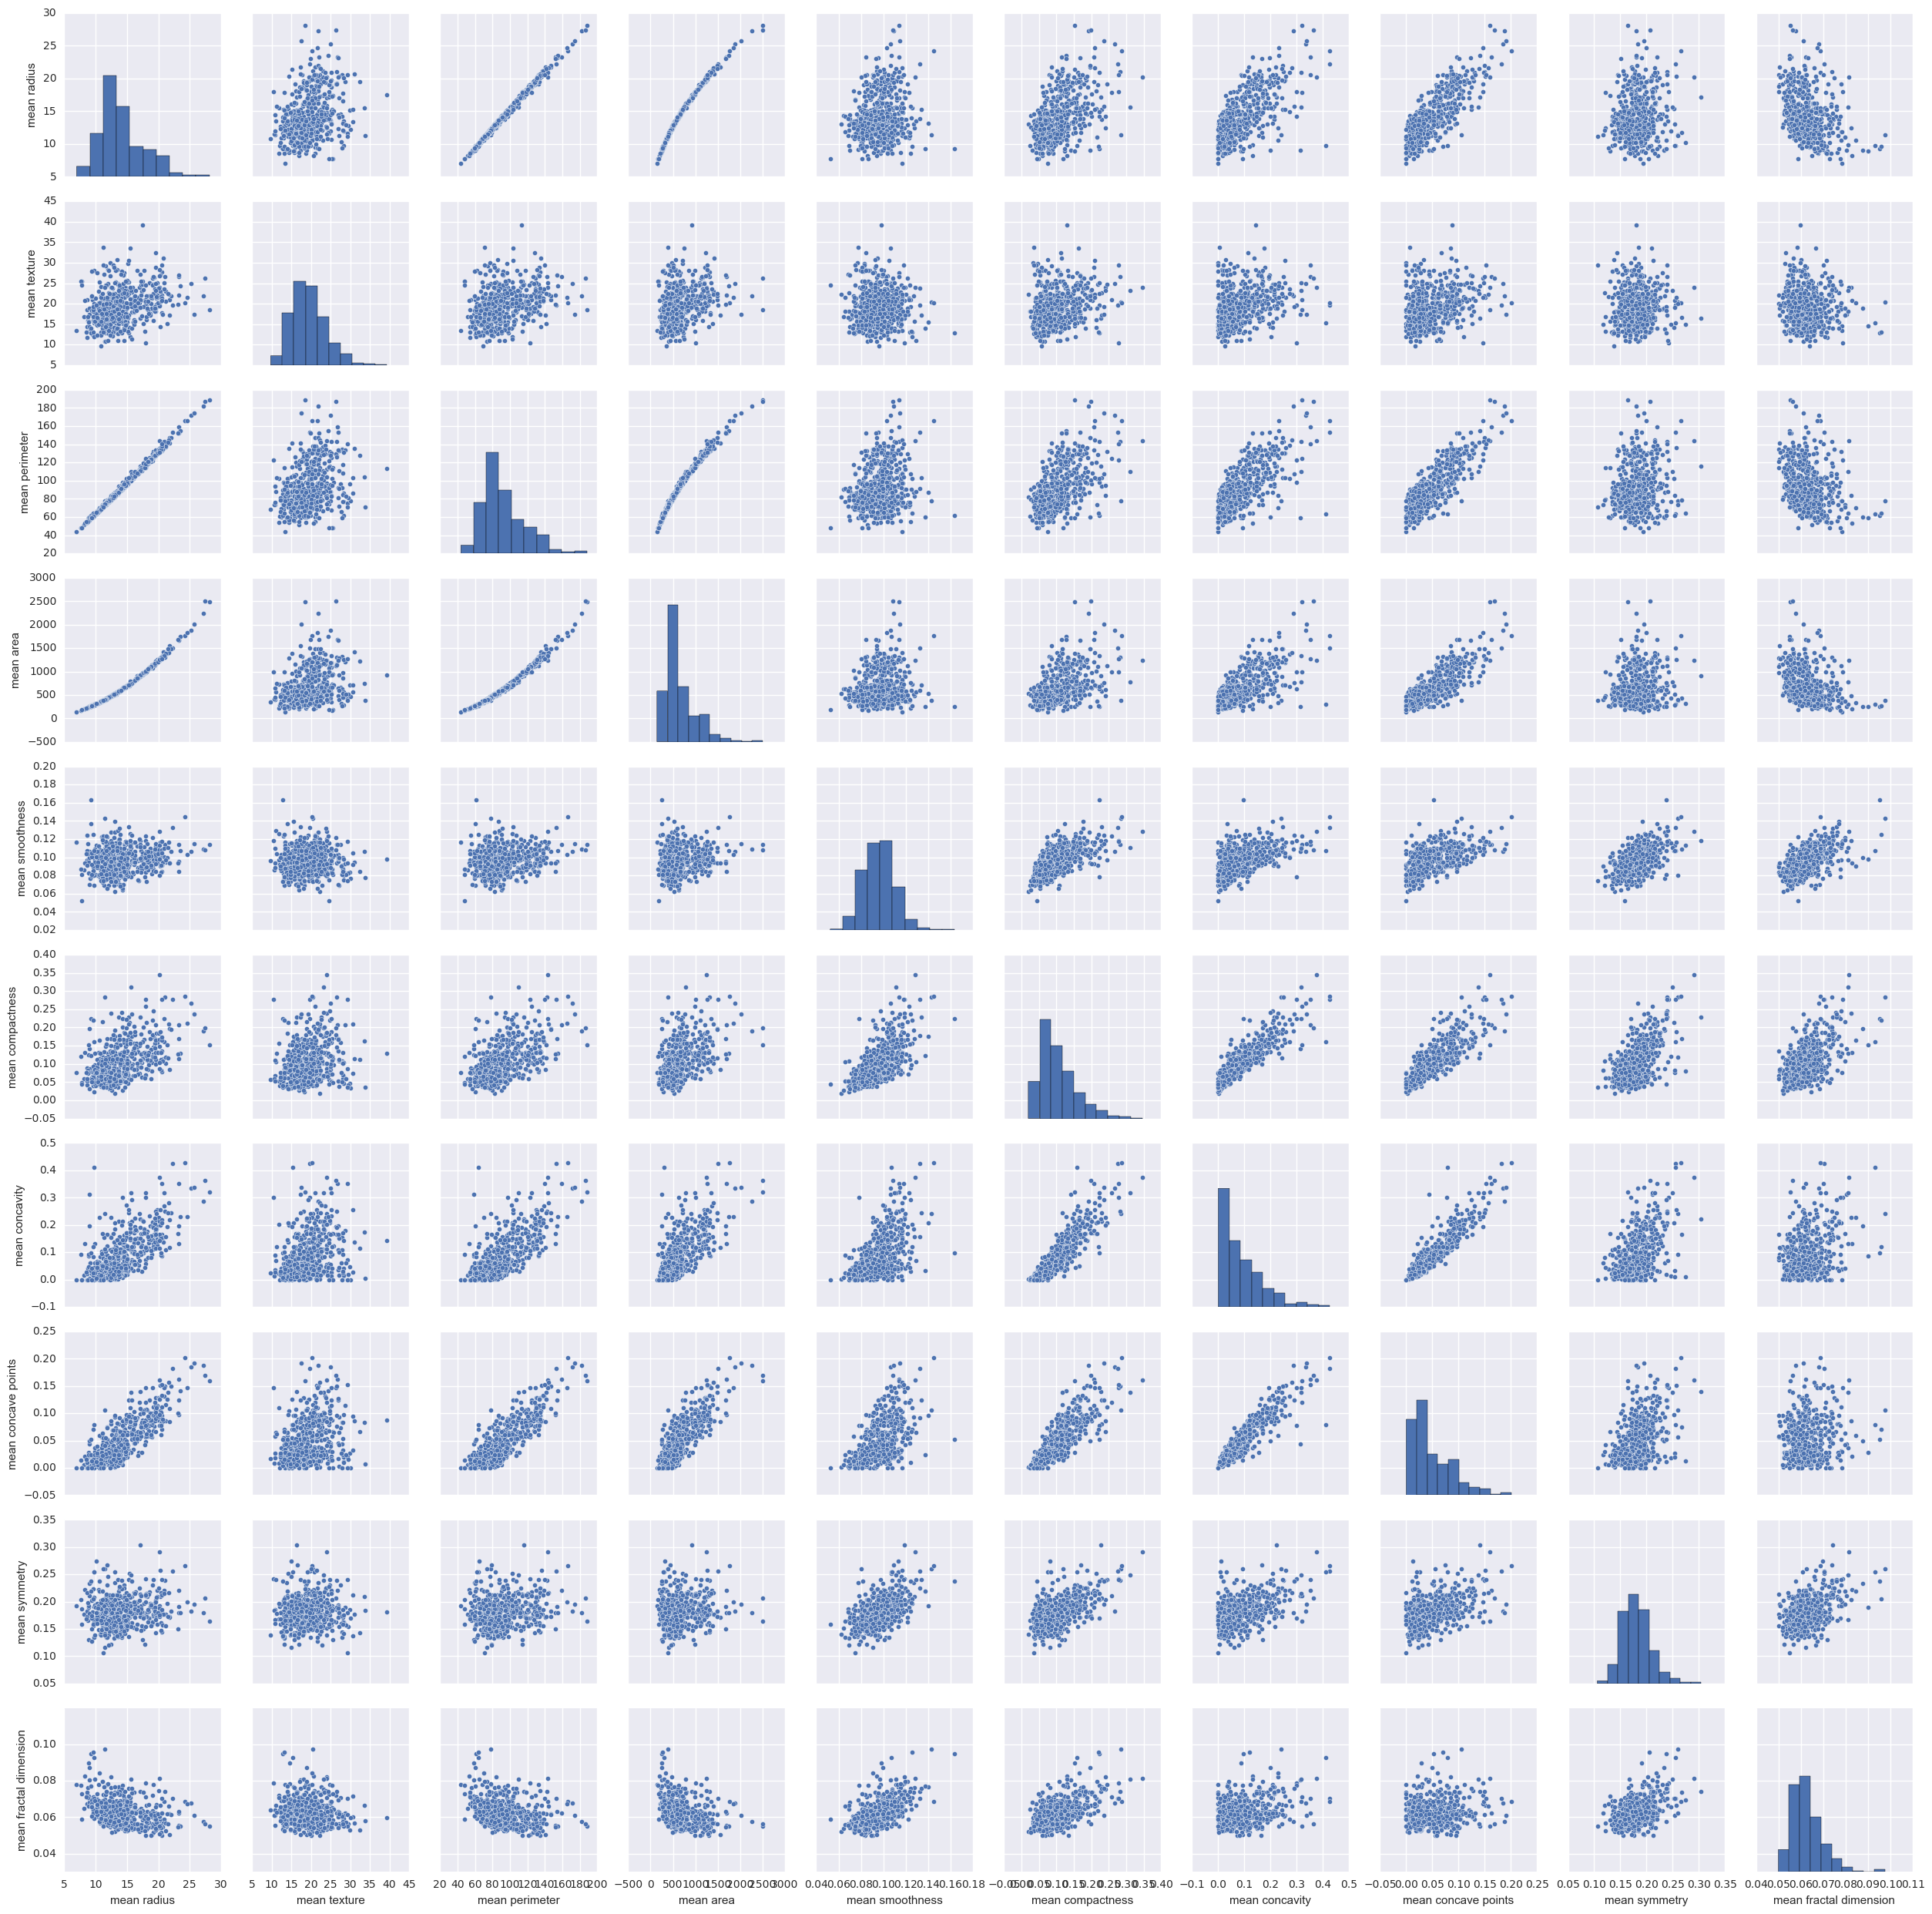

In [55]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171f8d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121b466d0>]], dtype=object)

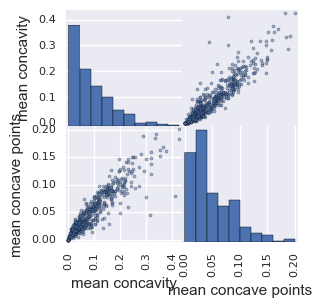

In [56]:
df = pd.DataFrame(data.data[:, 6:8], columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3))

In [57]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [59]:
X.shape

(569, 2)

In [61]:
y.shape

(569,)

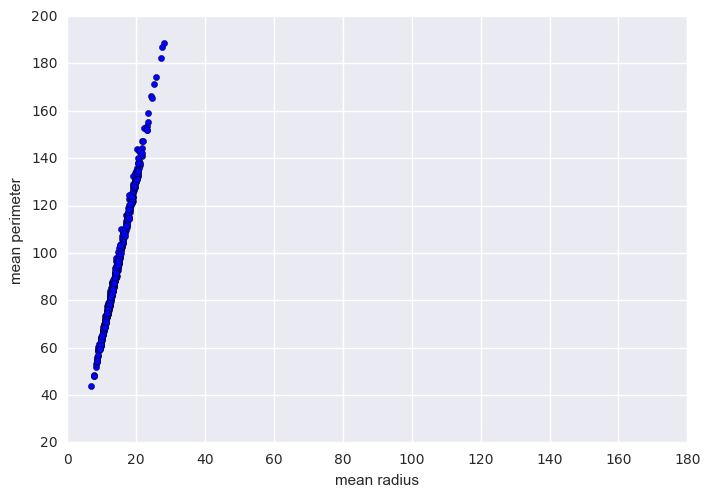

In [62]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA()

In [65]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_new = pca.transform(X)

(-60, 120)

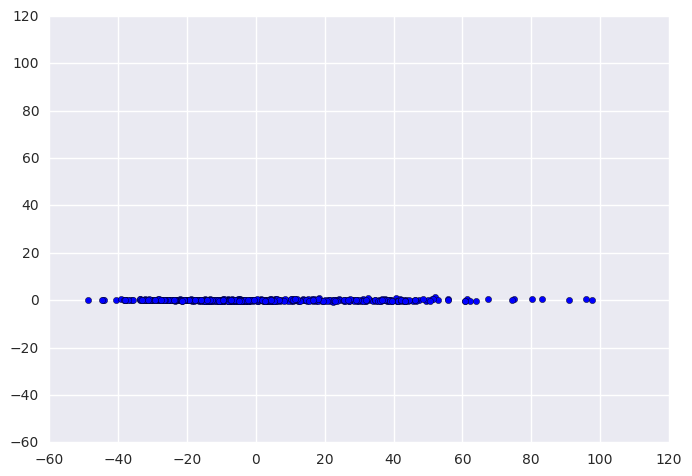

In [68]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

In [69]:
pca.explained_variance_

array([  6.01747863e+02,   5.20297651e-02])

In [70]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([  9.99913543e-01,   8.64569199e-05])

In [72]:
pca.explained_variance_ratio_

array([  9.99913543e-01,   8.64569199e-05])

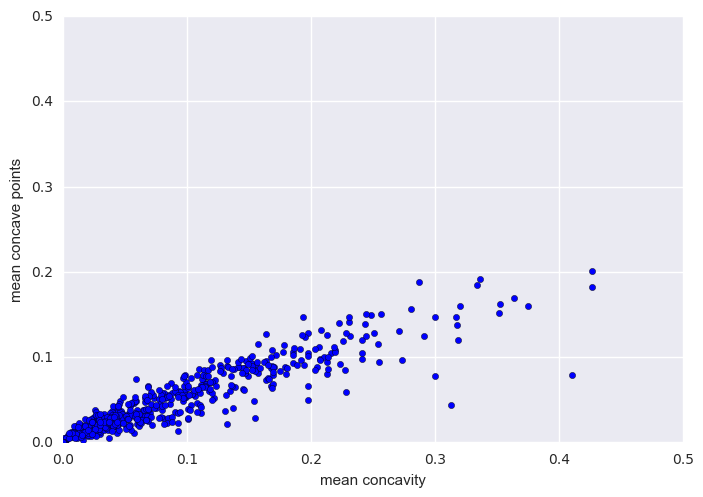

In [73]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

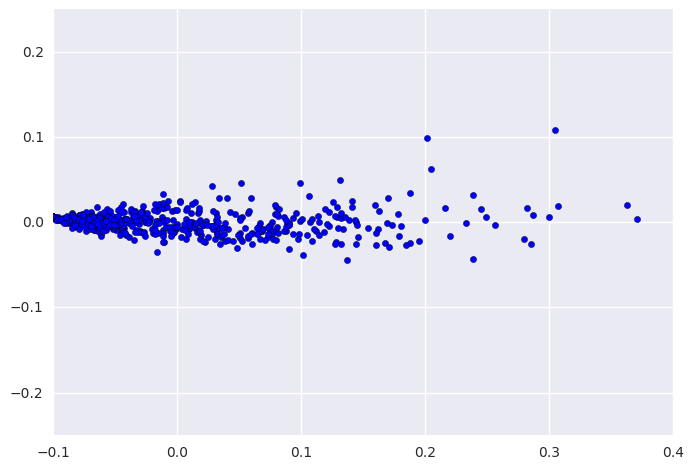

In [75]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [76]:
pca.explained_variance_

array([ 0.00765906,  0.00018804])

In [77]:
pca.explained_variance_ratio_

array([ 0.97603731,  0.02396269])

In [78]:
m = X.mean(axis=0)

In [79]:
Xp = (X-m)

In [80]:
C = Xp.transpose().dot(Xp)

In [81]:
w, _ = np.linalg.eig(C)

In [82]:
w

array([ 4.3580028 ,  0.10699332])

In [83]:
w / w.sum()

array([ 0.97603731,  0.02396269])

In [84]:
X = data.data

In [85]:
y = data.target

In [86]:
from sklearn.model_selection import ShuffleSplit

In [87]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

In [88]:
train_index, test_index = next(ss.split(X, y))

In [89]:
X_train, X_test = X[train_index], X[test_index]

In [90]:
y_train, y_test = y[train_index], y[test_index]

In [96]:
pca  = PCA()
pca_w_y =PCA()

In [100]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
pca.components_

array([[  4.96994700e-03,   2.08583464e-03,   3.41956840e-02,
          5.12094322e-01,   3.86436997e-06,   3.78910941e-05,
          7.71099515e-05,   4.62471505e-05,   5.94453837e-06,
         -2.68037529e-06,   3.13778362e-04,  -8.03158553e-05,
          2.21422300e-03,   5.66314250e-02,  -7.78698672e-07,
          4.48551326e-06,   6.51854641e-06,   2.78331907e-06,
         -1.49186308e-06,  -1.17404700e-07,   7.05061485e-03,
          2.92940561e-03,   4.86165544e-02,   8.54942673e-01,
          6.01936589e-06,   9.38263636e-05,   1.53594914e-04,
          7.04776684e-05,   1.60176184e-05,   1.19349592e-06],
       [  8.98453506e-03,  -3.79959971e-03,   6.07491688e-02,
          8.53842515e-01,  -1.18724925e-05,  -2.11150415e-06,
          7.45672471e-05,   4.68920078e-05,  -1.94282019e-05,
         -1.43144004e-05,   9.54634663e-05,   1.27729583e-04,
          1.63691821e-03,   2.99485618e-02,   1.63585000e-06,
          1.11635198e-05,   2.16409946e-05,   6.55826070e-06,
       

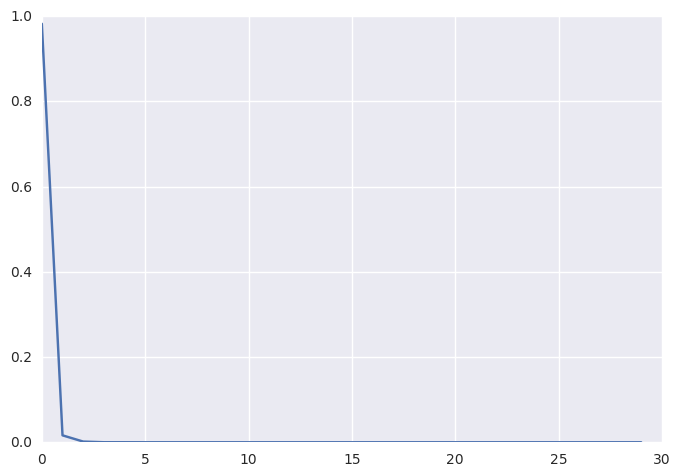

In [102]:
plt.plot(pca.explained_variance_ratio_)

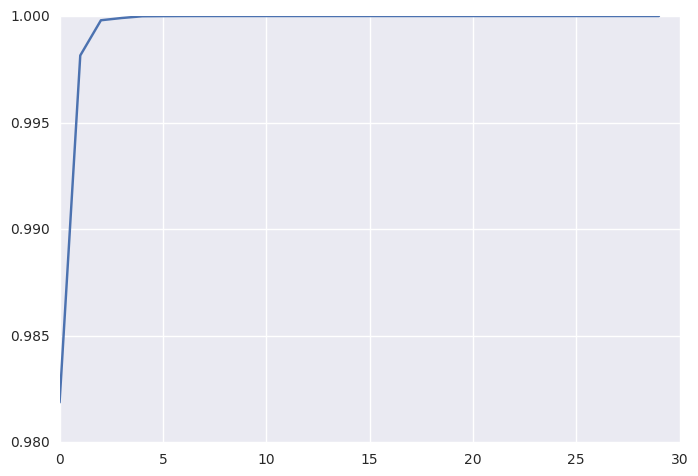

In [103]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [104]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [105]:
X_train_pca

array([[ -6.04753682e+02,  -3.88235725e+01,   1.27036258e+01, ...,
          1.65606568e-03,  -6.79165096e-04,   7.15960483e-05],
       [ -4.88463997e+02,  -5.10471286e+01,   9.05491820e+00, ...,
         -1.06738042e-04,  -1.02025064e-03,  -3.82526791e-04],
       [  1.31695999e+02,   9.07258194e+01,  -2.87732561e+01, ...,
         -9.34341335e-04,   1.29073660e-04,  -7.23248575e-05],
       ..., 
       [ -5.72905390e+02,  -9.48487001e+01,   2.61978133e+01, ...,
         -1.65096796e-03,   2.69615179e-04,  -6.77630854e-04],
       [ -6.85294859e+02,  -1.68240161e+01,   2.22812726e+01, ...,
          2.15919949e-03,  -6.56124820e-03,  -2.43570020e-03],
       [ -4.79252970e+02,  -5.75300937e+00,   3.78706109e+00, ...,
          1.04969406e-04,   1.45958294e-04,   1.63495012e-04]])

In [106]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [107]:
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
clf.score(X_test_pca, y_test)

0.94736842105263153

In [109]:
clf.fit(X_train_pca[:, 0:1], y_train)
clf.score(X_test_pca[:, 0:1], y_test)

0.92105263157894735

In [110]:
clf.fit(X_train_pca[:, 0:3], y_train)
clf.score(X_test_pca[:, 0:3], y_test)

0.94736842105263153

In [112]:
scores = []
i_range = range(1,31)
for i in i_range:
    
    clf.fit(X_train_pca[:, 0:i], y_train)
    scores.append(clf.score(X_test_pca[:, 0:i], y_test))

scores = np.array(scores)

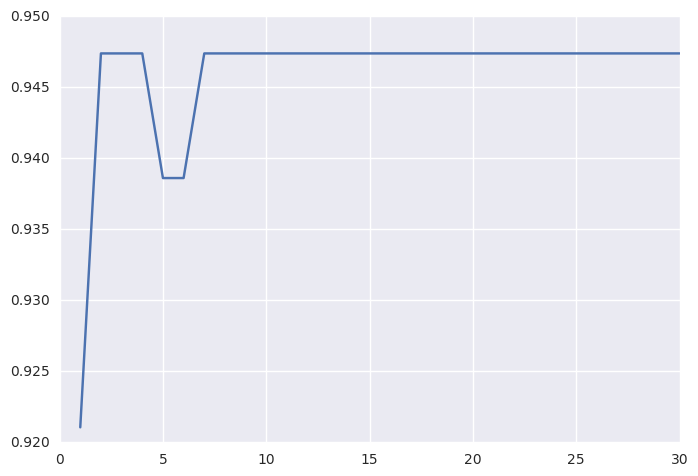

In [113]:
plt.plot(i_range, scores)

In [114]:
clf.fit(X_train_pca[:, 0:2], y_train)
clf.score(X_test_pca[:, 0:2], y_test)

0.94736842105263153

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
polf = PolynomialFeatures(degree=2)

In [120]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [121]:
X_train_poly = polf.transform(X_train)
X_test_poly = polf.transform(X_test)

In [122]:
X_train_poly.shape

(455, 496)

In [123]:
X_test_poly.shape

(114, 496)

In [124]:
X_train.shape

(455, 30)

In [125]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.96491228070175439

In [126]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
clf.score(X_test, y_test)

0.95614035087719296

In [128]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(0, 5)

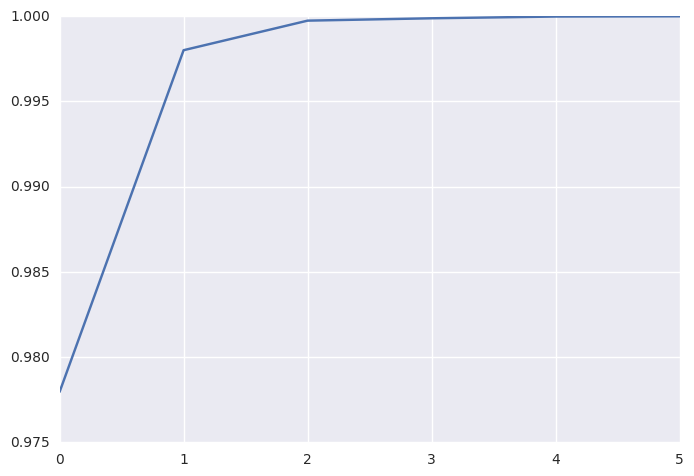

In [130]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))
plt.xlim(0,5)

In [135]:
scores = []
n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

In [136]:
X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)
for i in i_range:
    

    
    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    
    scores.append(clf.score(X_test_poly_pca[:, 0:i], y_test))

scores = np.array(scores)

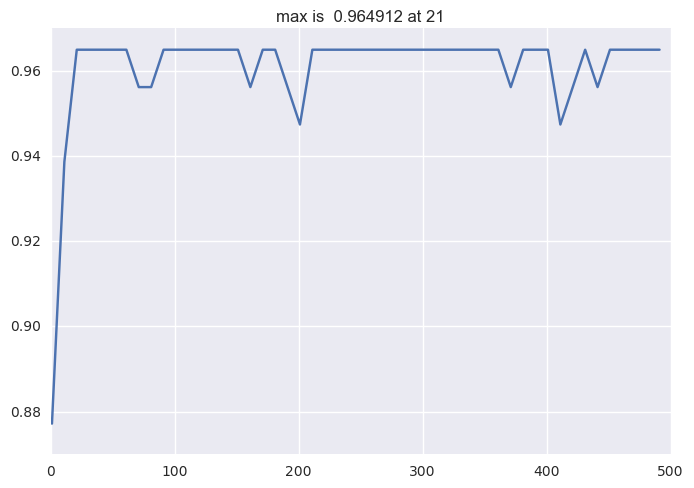

In [138]:
plt.plot(i_range, scores)
plt.title('max is {0: 2f} at {1}'.format( scores.max(), i_range[np.argmax(scores)]))

In [142]:
for d in [2,3,4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly = polf.transform(X_test)
    
    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca = pca.transform(X_test_poly)
    
    scores = []
    n_features  = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features, 10)
    
    print("max dimention: ", X_train_poly.shape[1])
    
    print("i =", end="")
    for i in i_range:
        print(i, end=", ")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append(clf.score(X_test_poly_pca[:, 0 : i ], y_test))
        
        print("")
        
        scores = np.array(scores)
        plt.plot(i_range, scores, label ='d={0}'.format(d))

plt.legend()
        
        
    

SyntaxError: invalid syntax (<ipython-input-142-90f3b05a0cac>, line 19)

In [143]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [144]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [145]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

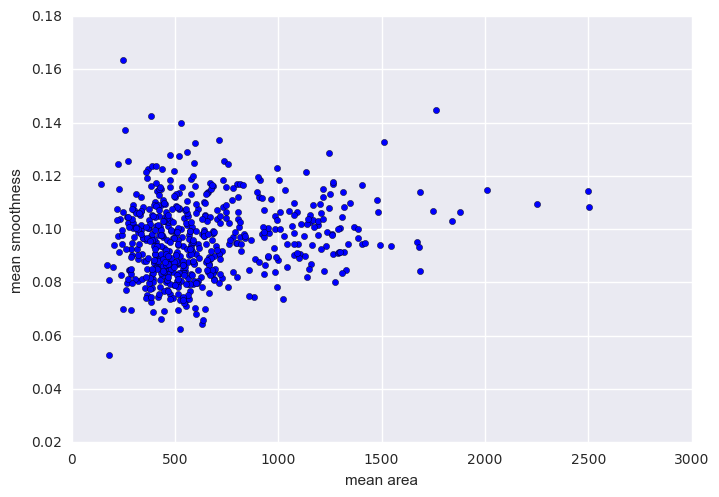

In [147]:
plt.scatter(data.data[:, 3], data.data[:, 4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

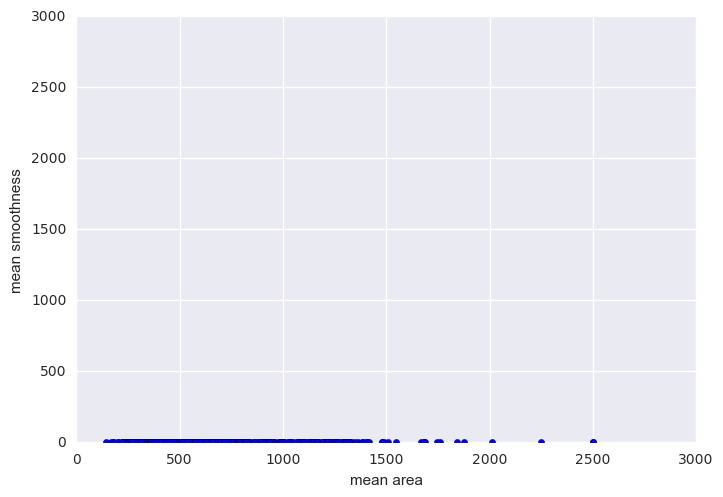

In [148]:
plt.scatter(data.data[:, 3], data.data[:, 4])
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [150]:
X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_indes, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [152]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [153]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [154]:
X_train_scale = scaler.transform(X_train)

In [157]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

(array([ -8.97694617e-16,  -3.35165351e-15,   3.23355506e-15,
         -2.22727819e-15,  -1.46512838e-15,   5.31740403e-16,
          6.61497719e-16,   4.76053873e-16,  -5.68678194e-15,
          6.94804409e-16,   4.90450171e-17,   5.76827963e-16,
          8.10706813e-16,   1.82881793e-16,   1.79160716e-15,
          4.15540618e-16,   3.25502751e-16,   6.02265490e-16,
         -1.51771148e-16,   1.34580991e-15,  -4.28960896e-16,
          4.92402212e-16,  -1.51795548e-15,   1.32494748e-16,
          5.92337534e-15,  -4.70369317e-16,  -1.36923440e-15,
          2.56327316e-16,  -2.12333204e-15,   1.99242332e-15]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]))

In [158]:
X_test_scale = scaler.transform(X_test)

In [159]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0)

(array([ 0.02090746,  0.16431947,  0.03098112,  0.01492717, -0.01921272,
         0.10117401,  0.0844404 ,  0.02966118,  0.04062282,  0.09495981,
         0.04653793,  0.06428685,  0.10007503,  0.00538732,  0.06604308,
         0.11840198,  0.06761678,  0.12691574,  0.01038083,  0.16199868,
         0.01337734,  0.11341872,  0.03390329, -0.00517026, -0.02001641,
         0.07842833,  0.11756483,  0.01212835, -0.02700757,  0.12745382]),
 array([ 0.98484055,  1.15221352,  0.99783441,  0.91061412,  1.09332501,
         1.20997119,  1.11614317,  1.02702513,  1.0034221 ,  1.16404942,
         0.86929934,  1.0858183 ,  0.95738032,  0.73797558,  1.25386932,
         1.10490478,  0.84120579,  1.20933979,  1.04289005,  1.05896921,
         0.94112182,  1.03290198,  0.96071254,  0.84629366,  1.04571542,
         1.12996138,  1.20450506,  1.03208579,  0.90829415,  1.06246714]))

/Users/Yusuke/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


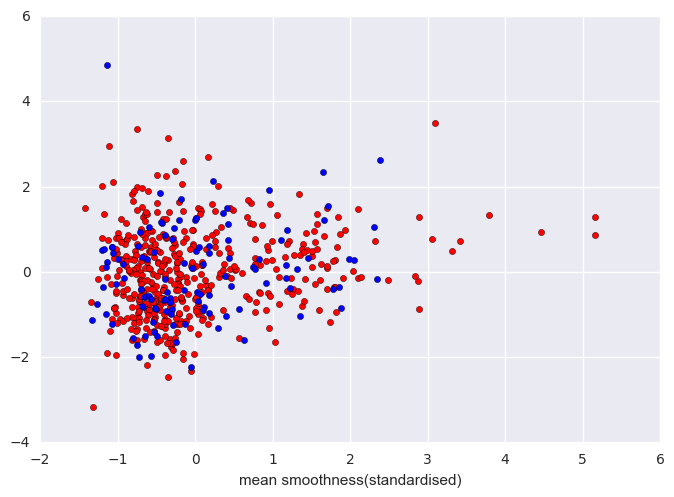

In [160]:
plt.scatter(X_train_scale[:, 3], X_train_scale[:, 4], c='r')
plt.scatter(X_test_scale[:, 3], X_test_scale[:, 4], c='b')
plt.xlabel(data.feature_names[3] + '(standardised)')
plt.xlabel(data.feature_names[4] + '(standardised)')
plt.legend(loc='best')

In [161]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [162]:
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.964912280702


In [163]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.956140350877


In [164]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1, 1])

In [165]:
mmscaler.fit(X_train)
X_train_mms = mmscaler.transform(X_train)
X_test_mms = mmscaler.transform(X_test)

In [166]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

In [167]:
clf.fit(X_train_mms, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
clf.score(X_test_mms, y_test)

0.96491228070175439

In [169]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [170]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [176]:
np.linalg.norm(X_train, axis=1)[:20]

array([  504.90301766,   618.934165  ,  1250.79346781,   680.57848004,
         789.01630477,   836.86533919,   694.54924712,   765.38441537,
         988.35346236,   624.18559733,  2090.96095333,   679.47567586,
        1094.37796043,   609.98361938,   490.99404722,   558.47604006,
        1758.43151043,   550.59180245,   843.30139448,   841.67151693])

In [177]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [178]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.719298245614


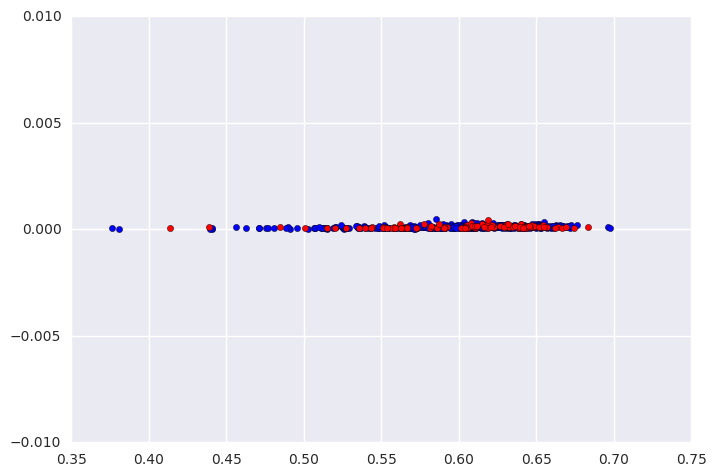

In [181]:
plt.scatter(X_train_norm[:, 3], X_train_norm[:, 4], c='b', label='train')
plt.scatter(X_test_norm[:, 3], X_test_norm[:,4], c='r', label='test')



In [182]:
for norm in ['l2', 'l1', 'max']:
    normalizer = Normalizer(norm=norm)
    normalizer.fit(X_train)
    X_train_norm = normalizer.transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    
    clf.fit(X_train_norm, y_train)
    print(norm, clf.score(X_test_norm, y_test))

('l2', 0.7192982456140351)
('l1', 0.60526315789473684)
('max', 0.81578947368421051)


(0, 0.5)

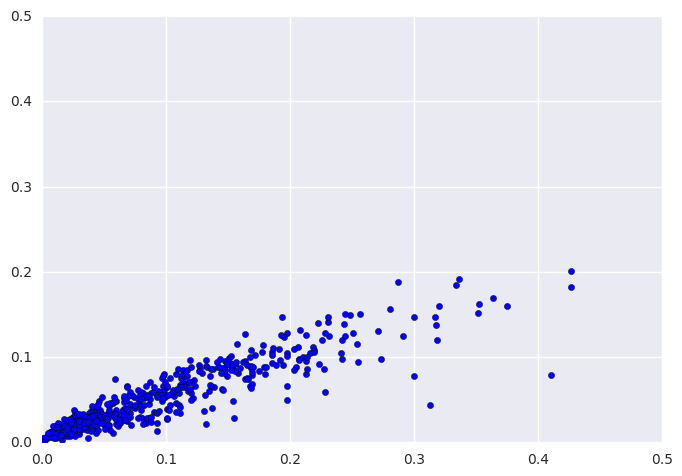

In [183]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

In [184]:
from sklearn.decomposition import PCA

In [185]:
pca = PCA()

(-0.25, 0.25)

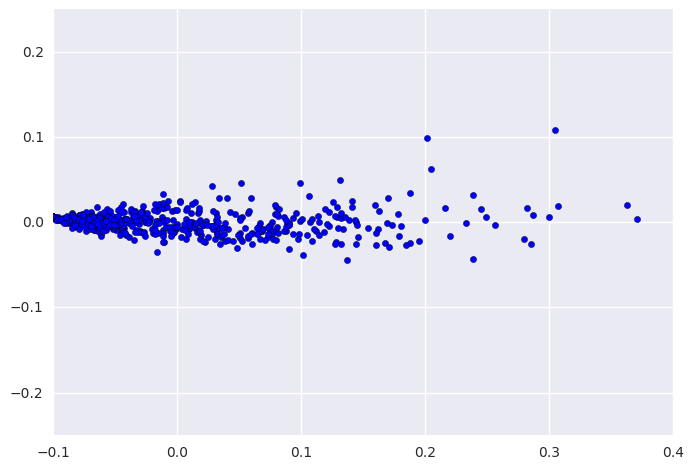

In [186]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [187]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([  1.46338712e-18,   3.29262101e-18]),
 array([ 0.08751603,  0.01371268]))

(-4, 10)

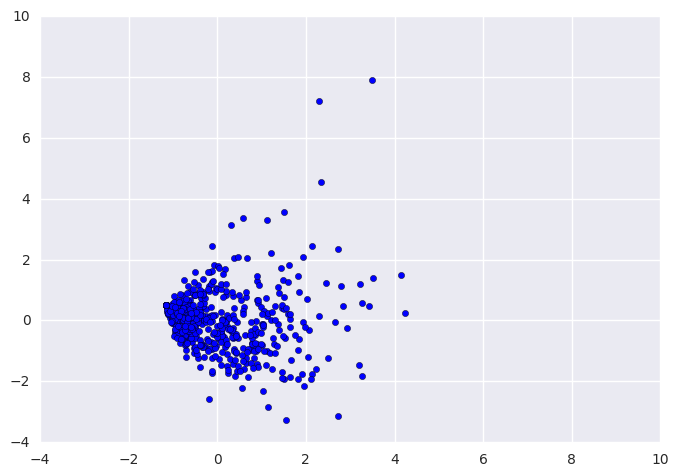

In [188]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

In [190]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([  9.32665388e-17,   2.43702734e-16]), array([ 1.,  1.]))

In [195]:
X = np.random.uniform(low=-1, high=1, size=(1000,2)) * (2,1)

(-3, 3)

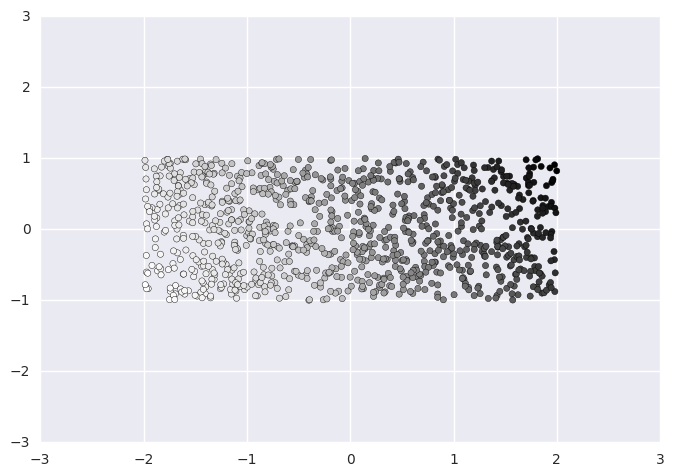

In [196]:
y = 2 * X[:, 0] + X[:, 1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [197]:
angle = np.pi/4

In [199]:
R = np.array([[np.sin(angle), -np.cos(angle)], [np.cos(angle), np.sin(angle)]])

In [201]:
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3, 3)

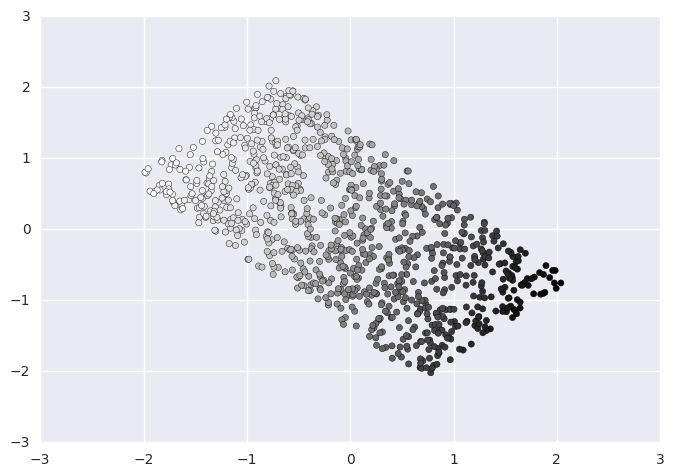

In [202]:
X_rot = X.dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [207]:
pca = PCA(whiten=True)
pca.fit(X_rot)
X_new = pca.transform(X_rot)

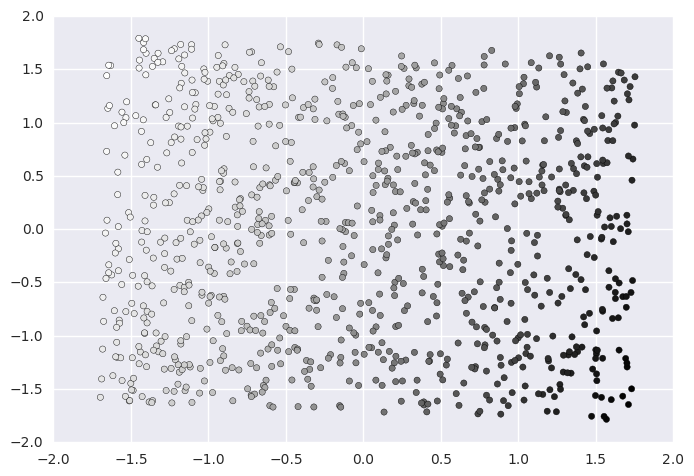

In [208]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)


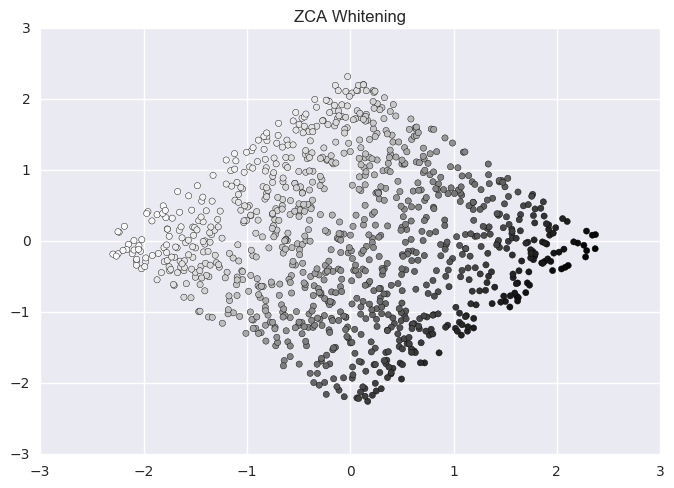

In [209]:
X_new2 = X_new.dot(pca.components_)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("ZCA Whitening")

In [210]:
pca.components_

array([[ 0.68860698, -0.72513477],
       [-0.72513477, -0.68860698]])